
<img width="60" src="https://drive.google.com/uc?export=view&id=1JQRWCUpJNAvselJbC_K5xa5mcKl1gBQe"> 



In [1]:
# Uploading files from your local file system

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fandango_scores.csv to fandango_scores.csv
User uploaded file "fandango_scores.csv" with length 15144 bytes


# 1 - Introduction to the data



To investigate how different movie review sites the potential bias that movie reviews site has, **FiveThirtyEight** compiled data for 147 films from 2015 that have substantive reviews from both critics and consumers. Every time Hollywood releases a movie, critics from **Metacritic**, **Fandango**, **Rotten Tomatoes**, and **IMDB** review and rate the film. They also ask the users in their respective communities to review and rate the film. Then, they calculate the average rating from both critics and users and display them on their site. Here are screenshots from each site:


<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0VE5BNVVnT1piWjA">


FiveThirtyEight compiled this dataset to investigate if there was any bias to Fandango's ratings. In addition to aggregating ratings for films, Fandango is unique in that it also sells movie tickets, and so it has a direct commercial interest in showing higher ratings. After discovering that a few films that weren't good were still rated highly on Fandango, the team investigated and published an [article about bias in movie ratings](http://fivethirtyeight.com/features/fandango-movies-ratings/).


We'll be working with the **fandango_scores.csv** file, which can be downloaded from the [FiveThirtEight Github repo](https://github.com/fivethirtyeight/data/tree/master/fandango). Here are the columns we'll be working with in this mission:

- **FILM** - film name
- **RT_user_norm**  - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
- **Metacritic_user_nom**  - average user rating from Metacritc, normalized to a 1 to 5 point scale
- **IMDB_norm** - average user rating from IMDB, normalized to a 1 to 5 point scale
- **Fandango_Ratingvalue** - average user rating from Fandango, normalized to a 1 to 5 point scale
- **Fandango_Stars** - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)


Instead of displaying the raw rating, the writer discovered that Fandango usually rounded the average rating to the next highest half star (next highest **0.5** value). The **Fandango_Ratingvalue** column reflects the true average rating while the **Fandango_Stars** column reflects the displayed, rounded rating.

Let's read in this dataset, which allows us to compare how a movie fared across all 4 review sites.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">



**Description**:


1. Read **fandango_scores.csv** into a Dataframe named **reviews**.
2. Select the following columns and assign the resulting Dataframe to **norm_reviews**:
    - **FILM**
    - **RT_user_norm**
    - **Metacritic_user_nom** (note the misspelling of norm)
    - **IMDB_norm**
    - **Fandango_Ratingvalue**
    - **Fandango_Stars**
3. Display the first row in **norm_reviews**

In [2]:
# put your code here
import pandas as pd
reviews = pd.read_csv("fandango_scores.csv")

norm_reviews = reviews[["FILM","RT_user_norm","Metacritic_user_nom","IMDB_norm","Fandango_Ratingvalue","Fandango_Stars"]]
norm_reviews.head(1)

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


# 2 - Bar plot



These sites use different scales for ratings. Some use a 5 star scale while others use a 100 point scale. In addition, Metacritic and Rotten Tomatoes aggregate scores from both users and film critics, while IMDB and Fandango aggregate only from their users. We'll focus on just the average scores from users, because not all of the sites have scores from critics.

The **RT_user_norm**, **Metacritic_user_nom**, **IMDB_norm**, and **Fandango_Ratingvalue** columns contain the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie. While using averages isn't perfect because films with a few reviews can skew the average rating, FiveThirtyEight only selected movies with a non-trivial number of ratings to ensure films with only a handful of reviews aren't included.

If you look at the first row, which lists the average user ratings for **Avengers: Age of Ultron (2015)**, you'll notice that the Fandango ratings, both the actual and the displayed rating, are higher than those from the other sites for a given movie. While calculating and comparing summary statistics give us hard numbers for quantifying the bias, visualizing the data using plots can help us gain a more intuitive understanding. We need a visualization that scales graphical objects to the quantitative values we're interested in comparing. One of these visualizations is a **bar plot**.

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0T1ltc2tnb2lDbHc">


In the bar plot above, the x-axis represented the different ratings and the y-axis represented the actual ratings. An effective bar plot uses categorical values on one axis and numerical values on the other axis. Because bar plots can help us find the category corresponding to the smallest or largest values, it's important that we restrict the number of bars in a single plot. Using a bar plot to visualize hundreds of values makes it difficult to trace the category with the smallest or largest value.

If the x-axis contains the categorical values and the rectangular bars are scaled vertically, this is known as a vertical bar plot. A horizontal bar plot flips the axes, which is useful for quickly spotting the largest value.

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0cDhyZEttU0JTSnM">

An effective bar plot uses a consistent width for each bar. This helps keep the visual focus on the heights of the bars when comparing. Let's now learn how to create a vertical bar plot in matplotlib that represents the different user scores for Avengers: Age of Ultron (2015).

# 3 - Creating bars



When we generated line charts, we passed in the data to **pyplot.plot()** and matplotlib took care of the rest. Because the markers and lines in a line chart correspond directly with x-axis and y-axis coordinates, all matplotlib needed was the data we wanted plotted. To create a useful bar plot, however, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels. Here's a diagram that shows the various values we need to specify:

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0NkExT245Q2Fva00">


We'll focus on positioning the bars on the x-axis in this step and on positioning the x-axis labels in the next step. We can generate a vertical bar plot using either [pyplot.bar()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) or [Axes.bar()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.bar). We'll use **Axes.bar()** so we can extensively customize the bar plot more easily. We can use [pyplot.subplots()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) to first generate a single subplot and return both the Figure and Axes object. This is a shortcut from the technique we used in the previous mission:

```python
fig, ax = plt.subplots()
```

The **Axes.bar()** method has 2 required parameters, left and height. We use the left parameter to specify the x coordinates of the left sides of the bar (marked in blue on the above image). We use the height parameter to specify the height of each bar. Both of these parameters accept a list-like object.

The [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) function returns evenly spaced values. We use **arange()** to generate the positions of the **left** side of our bars. This function requires a paramater that specifies the number of values we want to generate. We'll also want to add space between our bars for better readability:

```python
# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
import numpy as np
bar_positions = np.arange(5) + 0.75
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
ax.bar(bar_positions, bar_heights)
```


We can also use the width parameter to specify the width of each bar. This is an optional parameter and the width of each bar is set to **0.8** by default. The following code sets the width parameter to **1.5**:

```python
ax.bar(bar_positions, bar_heights, 1.5)
```

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">



1. Create a single subplot and assign the returned Figure object to **fig** and the returned Axes object to **ax**.
2. Generate a bar plot with:
    - **left** set to **bar_positions**
    - **height** set to **bar_heights**
    - **width** set to 0.5
3. Use **plt.show()** to display the bar plot.

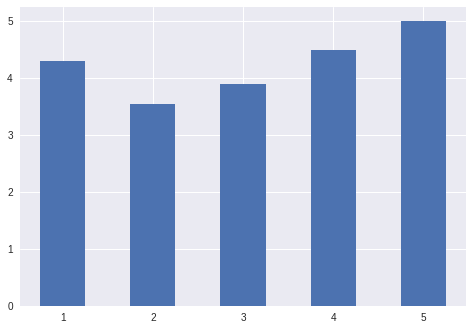

In [14]:
# put your code here
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

bar_positions = 1 + np.arange(5)
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values

ax.bar(bar_positions, bar_heights, 0.5)

plt.show()

# 4 - Aligning Axis Ticks And Labels




By default, matplotlib sets the x-axis tick labels to the integer values the bars spanned on the x-axis (from **0** to **6**). We only need tick labels on the x-axis where the bars are positioned. We can use [Axes.set_xticks()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticks) to change the positions of the ticks to **[1, 2, 3, 4, 5]**:

```python
tick_positions = range(1,6)
ax.set_xticks(tick_positions)
```

Then, we can use [Axes.set_xticklabels()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticklabels) to specify the tick labels:

```python
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
ax.set_xticklabels(num_cols)
```

If you look at the [documentation](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticklabels) for the method, you'll notice that we can specify the orientation for the labels using the **rotation** parameter:

```python
ax.set_xticklabels(num_cols, rotation=90)
```

Rotating the labels by 90 degrees keeps them readable. In addition to modifying the x-axis tick positions and labels, let's also set the x-axis label, y-axis label, and the plot title.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


1. Create a single subplot and assign the returned Figure object to **fig** and the returned Axes object to **ax**.
2. Generate a bar plot with:
    - **left** set to **bar_positions**
    - **height** set to **bar_heights**
    - **width** set to **0.5**
3. Set the x-axis tick positions to **tick_positions**.
4. Set the x-axis tick labels to **num_cols** and rotate by **90** degrees.
5. Set the x-axis label to **"Rating Source"**.
6. Set the y-axis label to **"Average Rating"**.
7. Set the plot title to **"Average User Rating For Avengers: Age of Ultron (2015)"**.
8. Use **plt.show()** to display the bar plot.

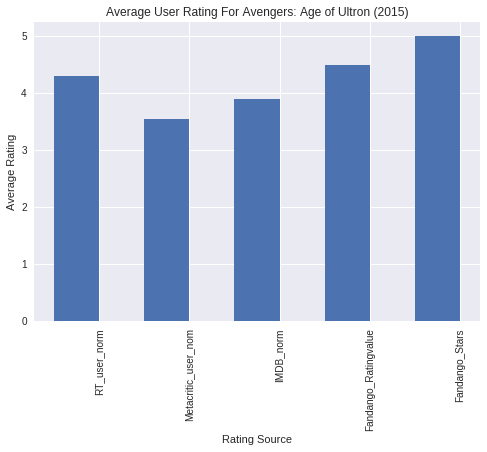

In [0]:
# put your code here
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)

tick_positions = range(1,6)
ax.set_xticks(tick_positions)

ax.set_xticklabels(['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars'], rotation=90)

plt.xlabel("Rating Source")
plt.ylabel("Average Rating")
plt.title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()

# 5 - Horizontal bar plot



We can create a horizontal bar plot in matplotlib in a similar fashion. Instead of using **Axes.bar()**, we use [Axes.barh()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.barh). This method has 2 required parameters, **bottom** and **width**. We use the **bottom** parameter to specify the y coordinate for the bottom sides for the bars and the **width** parameter to specify the lengths of the bars:

```python
bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
ax.barh(bar_positions, bar_widths, 0.5)
```

To recreate the bar plot from the last step as horizontal bar plot, we essentially need to map the properties we set for the y-axis instead of the x-axis. We use **Axes.set_yticks()** to set the y-axis tick positions to **[1, 2, 3, 4, 5]** and **Axes.set_yticklabels()** to set the tick labels to the column names:

```python
tick_positions = range(5) + 1
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
```

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


1. Create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.
2. Generate a bar plot with:
    - bottom set to bar_positions
    - width set to bar_widths
    - height set to 0.5
3. Set the y-axis tick positions to tick_positions.
4. Set the y-axis tick labels to num_cols.
5. Set the y-axis label to "Rating Source".
6. Set the x-axis label to "Average Rating".
7. Set the plot title to "Average User Rating For Avengers: Age of Ultron (2015)".
8. Use plt.show() to display the bar plot.

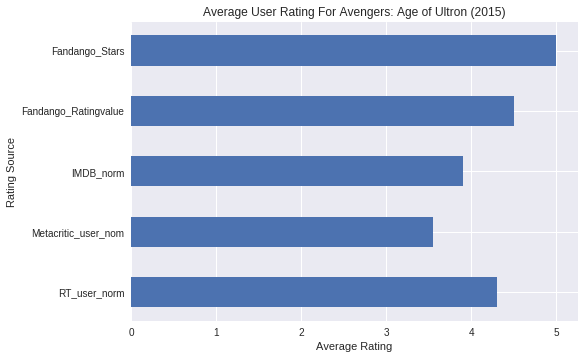

In [0]:
# put your code here
fig, ax = plt.subplots()

bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = np.arange(5) + 0.75
ax.barh(bar_positions, bar_widths, 0.5)

tick_positions = np.arange(5) + 0.75
ax.set_yticks(tick_positions)
ax.set_yticklabels(['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars'])
plt.ylabel("Rating Source")
plt.xlabel("Average Rating")
plt.title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()

# 6 - Scatter plot



From the horizontal bar plot, we can more easily determine that the 2 average scores from Fandango users are higher than those from the other sites. While bar plots help us visualize a few data points to quickly compare them, they aren't good at helping us visualize many data points. Let's look at a plot that can help us visualize many points.

In the previous mission, the line charts we generated always connected points from left to right. This helped us show the trend, up or down, between each point as we scanned visually from left to right. Instead, we can avoid using lines to connect markers and just use the underlying markers. A plot containing just the markers is known as a **scatter plot**.


<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0bDdWNU5HVDdpUHc">


A scatter plot helps us determine if 2 columns are weakly or strongly correlated. While calculating the [correlation coefficient](https://en.wikipedia.org/wiki/Correlation_coefficient) will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.

To generate a scatter plot, we use [Axes.scatter()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.scatter). The **scatter()** method has 2 required parameters, **x** and **y**, which matches the parameters of the **plot()** method. The values for these parameters need to be iterable objects of matching lengths (lists, NumPy arrays, or pandas series).

Let's start by creating a scatter plot that visualizes the relationship between the **Fandango_RatingValue** and **RT_user_norm** columns. We're looking for at least a weak correlation between the columns.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


1. Create a single subplot and assign the returned Figure object to **fig** and the returned Axes object to **ax**.
2. Generate a scatter plot with the **Fandango_Ratingvalue** column on the x-axis and the  **RT_user_norm** column on the y-axis.
3. Set the x-axis label to **"Fandango"** and the y-axis label to **"Rotten Tomatoes"**.
4. Use **plt.show() ** to display the resulting plot.

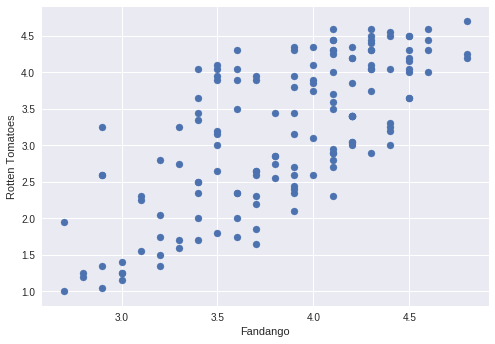

In [0]:
# put your code here
fig, ax = plt.subplots()
plt.scatter(reviews["Fandango_Ratingvalue"], reviews["RT_user_norm"])
plt.ylabel("Rotten Tomatoes")
plt.xlabel("Fandango")

plt.show()

# 7 -Switching axes



The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple corresponding y values. The correlation is positive because, in general, as x increases, y also increases.

When using scatter plots to understand how 2 variables are correlated, it's usually not important which one is on the x-axis and which one is on the y-axis. This is because the relationship is still captured either way, even if the plots look a little different. If you want to instead understand how an independent variable affects a dependent variables, you want to put the independent one on the x-axis and the dependent one on the y-axis. Doing so helps emphasize the potential cause and effect relation.

In our case, we're not exploring if the ratings from Fandango influence those on Rotten Tomatoes and we're instead looking to understand how much they agree. Let's see what happens when we flip the columns.

# 8 - Benchmarking correlation



The second scatter plot is a mirror reflection of the first second scatter plot. The nature of the correlation is still reflected, however, which is the important thing. Let's now generate scatter plots to see how Fandango ratings correlate with all 3 of the other review sites.

When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis. In the 2 plots we generated in the last step, the ranges for both axes didn't match. We can use [Axes.set_xlim()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xlim) and [Axes.set_ylim()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_ylim) to set the data limits for both axes:

```python
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
```

By default, matplotlib uses the minimal ranges for the data limits necessary to display all of the data we specify. By manually setting the data limits ranges to specific ranges for all plots, we're ensuring that we can accurately compare. We can even use the methods we just mentioned to zoom in on a part of the plots. For example, the following code will constrained the axes to the **4** to **5** range:

```python
ax.set_xlim(4, 5)
ax.set_ylim(4, 5)
```

This makes small changes in the actual values in the data appear larger in the plot. A difference of **0.1** in a plot that ranges from **0** to **5** is hard to visually observe. A difference of **0.1** in a plot that only ranges from **4** to **5** is easily visible since the difference is 1/10th of the range.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


1. For the Subplot associated with **ax1**:
    - Generate a scatter plot with the **Fandango_Ratingvalue** column on the x-axis and the **RT_user_norm** column on the y-axis.
    - Set the x-axis label to **"Fandango"** and the y-axis label to **"Rotten Tomatoes"**.
    - Set the x-axis and y-axis data limits to range from **0** and **5**.
2. For the Subplot associated with **ax2**:
    - Generate a scatter plot with the **Fandango_Ratingvalue** column on the x-axis and the **Metacritic_user_nom** column on the y-axis.
    - Set the x-axis label to **"Fandango"** and the y-axis label to **"Metacritic"**.
    - Set the x-axis and y-axis data limits to range from **0** and **5**.
3. For the Subplot associated with **ax3**:
    - Generate a scatter plot with the **Fandango_Ratingvalue** column on the x-axis and the **IMDB_norm** column on the y-axis.
    - Set the x-axis label to **"Fandango"** and the y-axis label to **"IMDB"**.
    - Set the x-axis and y-axis data limits to range from **0** and **5**.
4. Use **plt.show()** to display the plots.

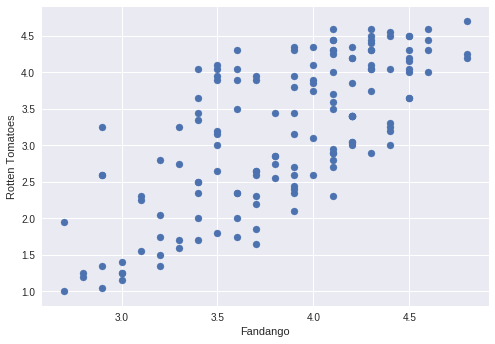

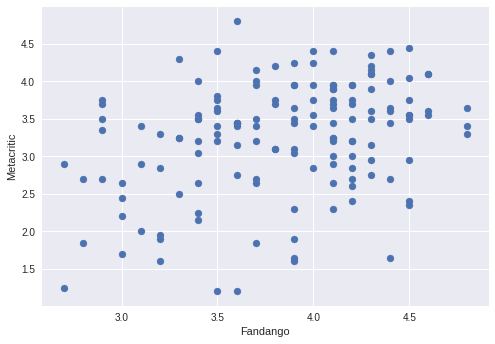

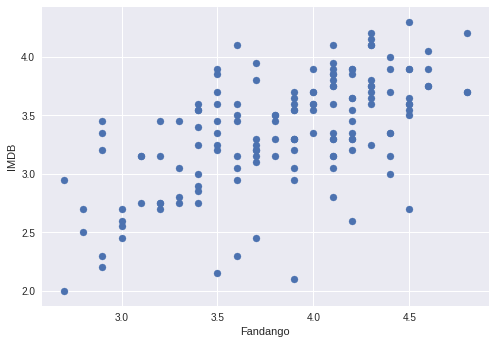

In [0]:
# put your code here
fig, ax1 = plt.subplots()
plt.scatter(reviews["Fandango_Ratingvalue"], reviews["RT_user_norm"])
plt.ylabel("Rotten Tomatoes")
plt.xlabel("Fandango")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

fig, ax2 = plt.subplots()
plt.scatter(reviews["Fandango_Ratingvalue"], reviews["Metacritic_user_nom"])
plt.ylabel("Metacritic")
plt.xlabel("Fandango")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

fig, ax2 = plt.subplots()
plt.scatter(reviews["Fandango_Ratingvalue"], reviews["IMDB_norm"])
plt.ylabel("IMDB")
plt.xlabel("Fandango")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

plt.show()

## 9. Next steps

From the scatter plots, we can conclude that user ratings from IMDB and Fandango are the most similar. In addition, user ratings from Metacritic and Rotten Tomatoes have positive but weak correlations with user ratings from Fandango. We can also notice that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

The scatter plots unfortunately only give us a cursory understanding of the distributions of user ratings from each review site. For example, if a hundred movies had the same average user rating from IMDB and Fandango in the dataset, we would only see a single marker in the scatter plot. In the next mission, we'll learn about two types of plots that help us understand distributions of values.